# Karman Oxygen CIA Model

Karman, T., Koenis, M.A.J., Banerjee, A. et al. O2−O2 and O2−N2 collision-induced absorption mechanisms unravelled. Nature Chem 10, 549–554 (2018). https://doi.org/10.1038/s41557-018-0015-x

In the Karman CIA model, two mechanisms are used to describe the underlying physics of collisionally induced absorption
*  Exchange mechanism - broader and applies only to paramagnetic collision partners
* Spin-orbit mechanism - narrower

In the article above, Karman reports a functional model for these functions and was kind enough to provide code for them that was integrated into the MATS program.  The adjustable parameters are ahard for the SO mechanism and gamma for the exchange mechanism initial guesses of 7 and 3 respectively.  There are also parameters EXCH_l and SO_l that describe the angular dependence (if they were to be equal to 0 you would only see the translational profile).  Karman mentioned the lso = 2 is the physically meaningful value, but that gives a positive peak a band center.  He mentiones the lexch could be 2 or 4.  Note that the l terms need to be integer values.

The examples below provide some examples of the effects that different parameters have on the look of the shape of the CIA.  This is helpful to explore before use in fitting data.



In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
import sys

sys.path.append(r'C:\Users\ema3\Documents\MATS\MATS')# set location of HAPI.py module

from MATS import *



HAPI version: 1.1.0.9.6
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005


1.2054599857012984
1.2054599857012984


Text(0, 0.5, 'CIA (ppm/cm)')

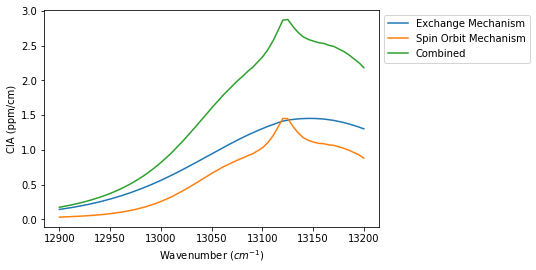

In [2]:
wavenumbers = np.arange(12900, 13200, step = 0.1)
temperature = 25
pressure = 1000

EXCHANGE_ONLY = Karman_CIA_Model(wavenumbers, pressure, temperature, wave_step = 5,
                     EXCH_scalar = 1, EXCH_gamma = 3, EXCH_l = 2,
                     SO_scalar = 0, SO_ahard = 7, SO_l = 2,
                     bandcenter = 13122, Nmax = 31)
SPIN_ORBIT_ONLY = Karman_CIA_Model(wavenumbers, pressure, temperature, wave_step = 5,
                     EXCH_scalar = 0, EXCH_gamma = 3, EXCH_l = 2,
                     SO_scalar = 1, SO_ahard = 7, SO_l = 2,
                     bandcenter = 13122, Nmax = 31)

plt.plot(wavenumbers, EXCHANGE_ONLY, label = 'Exchange Mechanism')
plt.plot(wavenumbers, SPIN_ORBIT_ONLY, label = 'Spin Orbit Mechanism')
plt.plot(wavenumbers, EXCHANGE_ONLY + SPIN_ORBIT_ONLY, label = 'Combined')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Wavenumber ($cm^{-1}$)')
plt.ylabel('CIA (ppm/cm)')

1.2054599857012984
1.2054599857012984
1.2054599857012984
1.2054599857012984


Text(0.5, 1.0, 'SO Mechanism')

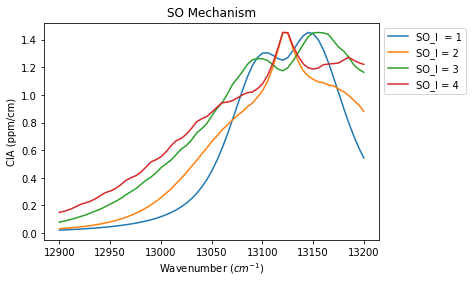

In [3]:
SO_a = Karman_CIA_Model(wavenumbers, pressure, temperature, wave_step = 5,
                     EXCH_scalar = 0, EXCH_gamma = 3, EXCH_l = 2,
                     SO_scalar = 1, SO_ahard = 7, SO_l = 2,
                     bandcenter = 13122, Nmax = 31)
SO_b = Karman_CIA_Model(wavenumbers, pressure, temperature, wave_step = 5,
                     EXCH_scalar = 0, EXCH_gamma = 3, EXCH_l = 2,
                     SO_scalar = 1, SO_ahard = 7, SO_l = 1,
                     bandcenter = 13122, Nmax = 31)
SO_c = Karman_CIA_Model(wavenumbers, pressure, temperature, wave_step = 5,
                     EXCH_scalar = 0, EXCH_gamma = 3, EXCH_l = 2,
                     SO_scalar = 1, SO_ahard = 7, SO_l = 3,
                     bandcenter = 13122, Nmax = 31)
SO_d = Karman_CIA_Model(wavenumbers, pressure, temperature, wave_step = 5,
                     EXCH_scalar = 0, EXCH_gamma = 3, EXCH_l = 2,
                     SO_scalar = 1, SO_ahard = 7, SO_l = 4,
                     bandcenter = 13122, Nmax = 31)

plt.plot(wavenumbers, SO_b, label = 'SO_l  = 1')
plt.plot(wavenumbers, SO_a, label = 'SO_l = 2')
plt.plot(wavenumbers, SO_c, label = 'SO_l = 3')
plt.plot(wavenumbers, SO_d, label = 'SO_l = 4')

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Wavenumber ($cm^{-1}$)')
plt.ylabel('CIA (ppm/cm)')
plt.title('SO Mechanism')

1.0
1.0
1.0
1.0


Text(0.5, 1.0, 'SO Mechanism')

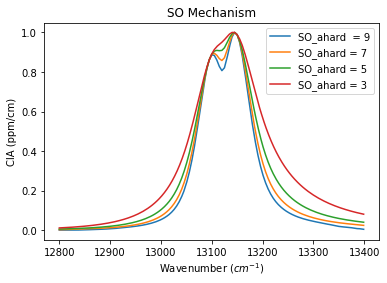

In [8]:
SO_a = Karman_CIA_Model(wavenumbers, pressure, temperature, wave_step = 5,
                     EXCH_scalar = 0, EXCH_gamma = 3, EXCH_l = 2,
                     SO_scalar = 1, SO_ahard = 7, SO_l = 1,
                     bandcenter = 13122, Nmax = 31)
SO_b = Karman_CIA_Model(wavenumbers, pressure, temperature, wave_step = 5,
                     EXCH_scalar = 0, EXCH_gamma = 3, EXCH_l = 2,
                     SO_scalar = 1, SO_ahard = 9, SO_l = 1,
                     bandcenter = 13122, Nmax = 31)
SO_c = Karman_CIA_Model(wavenumbers, pressure, temperature, wave_step = 5,
                     EXCH_scalar = 0, EXCH_gamma = 3, EXCH_l = 2,
                     SO_scalar = 1, SO_ahard = 5, SO_l = 1,
                     bandcenter = 13122, Nmax = 31)
SO_d = Karman_CIA_Model(wavenumbers, pressure, temperature, wave_step = 5,
                     EXCH_scalar = 0, EXCH_gamma = 3, EXCH_l = 2,
                     SO_scalar = 1, SO_ahard = 3, SO_l = 1,
                     bandcenter = 13122, Nmax = 31)

plt.plot(wavenumbers, SO_b, label = 'SO_ahard  = 9')
plt.plot(wavenumbers, SO_a, label = 'SO_ahard = 7')
plt.plot(wavenumbers, SO_c, label = 'SO_ahard = 5')
plt.plot(wavenumbers, SO_d, label = 'SO_ahard = 3')

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Wavenumber ($cm^{-1}$)')
plt.ylabel('CIA (ppm/cm)')
plt.title('SO Mechanism')

1.2054599857012984
1.2054599857012984
1.2054599857012984
1.2054599857012984


Text(0.5, 1.0, 'Exchange Mechanism')

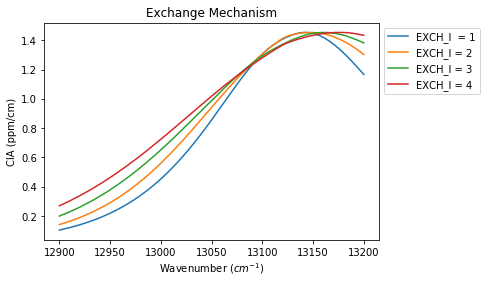

In [5]:
EXCH_a = Karman_CIA_Model(wavenumbers, pressure, temperature, wave_step = 5,
                     EXCH_scalar = 1, EXCH_gamma = 3, EXCH_l = 2,
                     SO_scalar = 0, SO_ahard = 7, SO_l = 2,
                     bandcenter = 13122, Nmax = 31)
EXCH_b = Karman_CIA_Model(wavenumbers, pressure, temperature, wave_step = 5,
                     EXCH_scalar = 1, EXCH_gamma = 3, EXCH_l = 1,
                     SO_scalar = 0, SO_ahard = 7, SO_l = 2,
                     bandcenter = 13122, Nmax = 31)
EXCH_c = Karman_CIA_Model(wavenumbers, pressure, temperature, wave_step = 5,
                     EXCH_scalar = 1, EXCH_gamma = 3, EXCH_l = 3,
                     SO_scalar = 0, SO_ahard = 7, SO_l = 2,
                     bandcenter = 13122, Nmax = 31)
EXCH_d = Karman_CIA_Model(wavenumbers, pressure, temperature, wave_step = 5,
                     EXCH_scalar = 1, EXCH_gamma = 3, EXCH_l =4,
                     SO_scalar = 0, SO_ahard = 7, SO_l = 2,
                     bandcenter = 13122, Nmax = 31)

plt.plot(wavenumbers, EXCH_b, label = 'EXCH_l  = 1')
plt.plot(wavenumbers, EXCH_a, label = 'EXCH_l = 2')
plt.plot(wavenumbers, EXCH_c, label = 'EXCH_l = 3')
plt.plot(wavenumbers, EXCH_d, label = 'EXCH_l = 4')

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Wavenumber ($cm^{-1}$)')
plt.ylabel('CIA (ppm/cm)')
plt.title('Exchange Mechanism')

1.2054599857012984
1.2054599857012984
1.2054599857012984
1.2054599857012984


Text(0.5, 1.0, 'Exchange Mechanism')

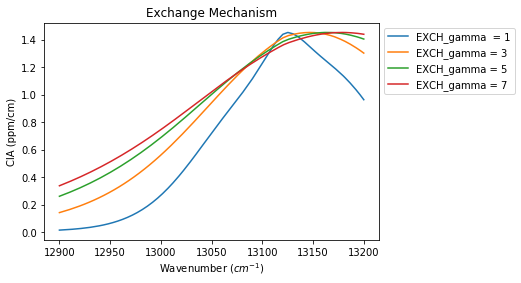

In [6]:
EXCH_a = Karman_CIA_Model(wavenumbers, pressure, temperature, wave_step = 5,
                     EXCH_scalar = 1, EXCH_gamma = 3, EXCH_l = 2,
                     SO_scalar = 0, SO_ahard = 7, SO_l = 2,
                     bandcenter = 13122, Nmax = 31)
EXCH_b = Karman_CIA_Model(wavenumbers, pressure, temperature, wave_step = 5,
                     EXCH_scalar = 1, EXCH_gamma = 1, EXCH_l = 2,
                     SO_scalar = 0, SO_ahard = 7, SO_l = 2,
                     bandcenter = 13122, Nmax = 31)
EXCH_c = Karman_CIA_Model(wavenumbers, pressure, temperature, wave_step = 5,
                     EXCH_scalar = 1, EXCH_gamma = 5, EXCH_l = 2,
                     SO_scalar = 0, SO_ahard = 7, SO_l = 2,
                     bandcenter = 13122, Nmax = 31)
EXCH_d = Karman_CIA_Model(wavenumbers, pressure, temperature, wave_step = 5,
                     EXCH_scalar = 1, EXCH_gamma = 7, EXCH_l =2,
                     SO_scalar = 0, SO_ahard = 7, SO_l = 2,
                     bandcenter = 13122, Nmax = 31)

plt.plot(wavenumbers, EXCH_b, label = 'EXCH_gamma  = 1')
plt.plot(wavenumbers, EXCH_a, label = 'EXCH_gamma = 3')
plt.plot(wavenumbers, EXCH_c, label = 'EXCH_gamma = 5')
plt.plot(wavenumbers, EXCH_d, label = 'EXCH_gamma = 7')

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Wavenumber ($cm^{-1}$)')
plt.ylabel('CIA (ppm/cm)')
plt.title('Exchange Mechanism')